# Soal 1
## Bagian A: Praproses Data

In [36]:
# Mengimport library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf

# Memuat data ke data frame pandas
df = pd.read_csv('insurance.csv')

# Menampilkan lima baris pertama data untuk memastikan data sudah terbaca dengan baik atau tidak
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


Dari hasil di atas bisa dilihat bahwa dataset berhasil dimuat ke Python untuk kemudian dianalisis lebih lanjut.

In [24]:
# Memeriksa apakah terdapat nilai yang hilang atau tidak
missing_values = df.isnull().sum()
print(missing_values)

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


Dari hasil yang didapatkan di atas bisa disimpulkan bahwa tidak terdapat nilai hilang dari setiap atribut. Ini berarti semua baris data memiliki atribut takkosong. Hal ini akan mengurangi keperluan untuk mengisi nilai yang kosong. 

In [38]:
# Menampilkan informasi mengenai setiap atribut yang ada pada dataset
df.info()

# Menampilkan informasi mengenai statistika dasar dari dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


Bisa diamati bahwa di untuk atribut yang memiliki nilai deviasi standar di atas 5, seperti atribut `age`, `steps`, `bmi` dan `charges` harus dilakukan pemrosesan lebih lanjut. Nilai standar deviasi di atas 5 ini menunjukkan bahwa *data point* pada *dataset* itu tersebar dalam rentang yang luas dari nilai rata-ratanya. Dengan adanya heterogenitas data yang tinggi, performa model *deep learning* akan menjadi semakin ditentukan oleh persebaran nilai tesebut. Jadi, bisa disimpulkan salah satu masalah yang ditemukan pada dataset ini adalah tingginya nilai `std` yang menentukan adanya *outliers* yang dapat membiaskan data. Untuk itu penanganan yang tepat adalah dengan menggunakan menormalisasi data numerikal terlebih dahulu dan melakukan transformasi data.   

In [40]:
# Menempatkan kolom numerik dalam satu frame 
numerical_columns = ['age', 'bmi', 'steps', 'children', 'charges']

# Buat objek scaler MinMax
scaler = MinMaxScaler()

# Normalisasi kolom numerik yang diidentifikasi
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Tampilkan dataset yang telah dinormalisasi
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,0.021739,0,0.321227,0.001284,0.0,1,3,0.251611,1
1,0.000000,1,0.479150,0.001141,0.2,0,2,0.009636,1
2,0.217391,1,0.458434,0.001284,0.6,0,2,0.053115,0
3,0.326087,1,0.181464,0.999857,0.0,0,1,0.333010,0
4,0.304348,1,0.347592,0.714693,0.0,0,1,0.043816,1


Setelah data dinormalisasi didapatkan deskripsi informasi pada data seperti di atas. 

In [42]:
# Menampilkan statistik data baru
df.describe()


,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.505232,0.395572,0.332186,0.218984,0.204783,1.515695,0.193916,0.585202
std,0.305434,0.500160,0.164062,0.350020,0.241099,0.403694,1.104885,0.193301,0.492871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.000000,0.278080,0.001141,0.000000,0.000000,1.000000,0.057757,0.000000
50%,0.456522,1.000000,0.388485,0.143652,0.200000,0.000000,2.000000,0.131849,1.000000
75%,0.717391,1.000000,0.504002,0.713837,0.400000,0.000000,2.000000,0.247700,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000


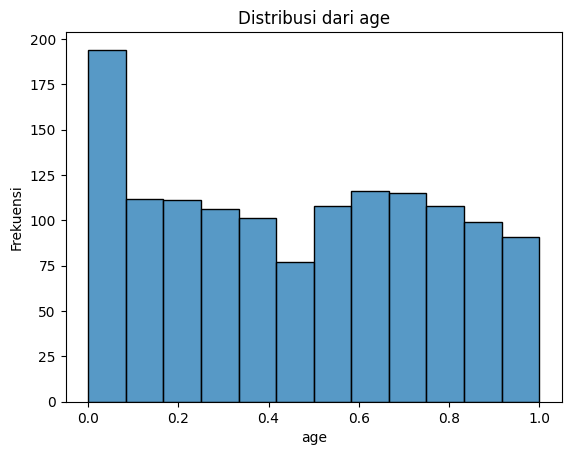

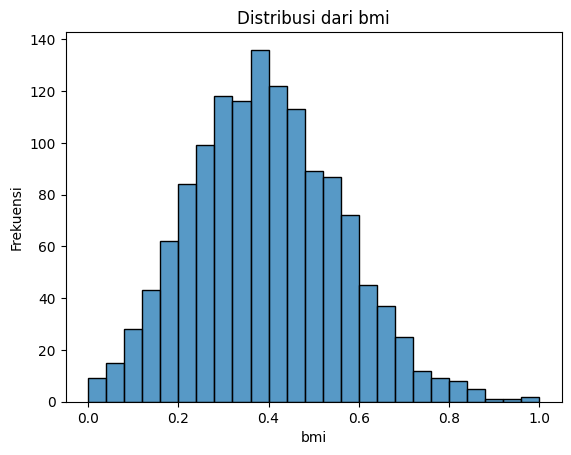

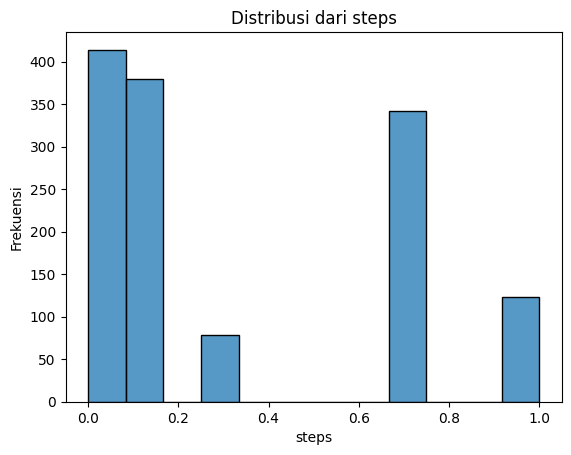

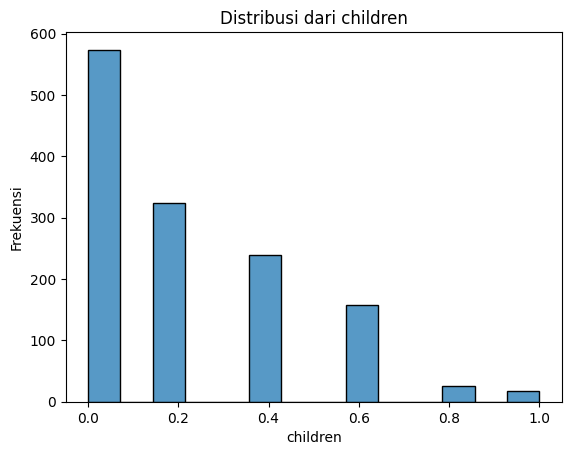

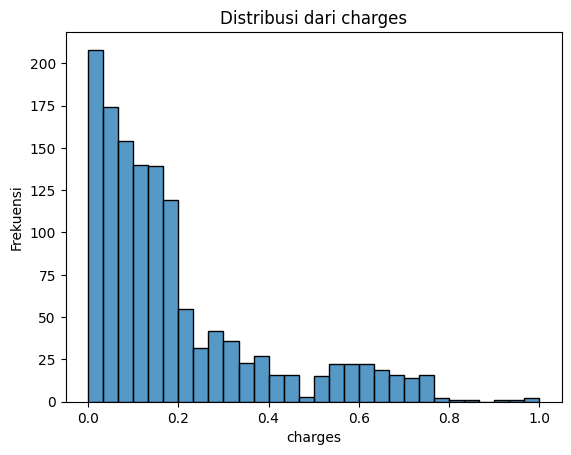

In [45]:
# Menampilkan distribusi data yang sudah dinormalisasi

for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi dari {column}')
    plt.show()

Untuk meningkatkan distribusi data yang masih kurang condong ke bentuk distribusi normal dilakukan trans box-cox, terutama untuk kolom `charges`, `age`, dan `steps`. Berikut adalah implementasinya. 

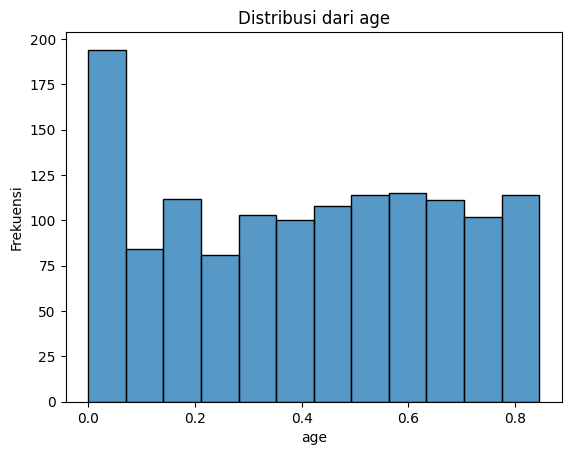

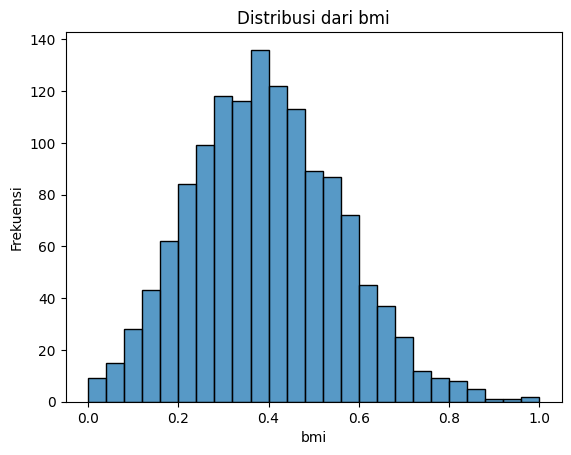

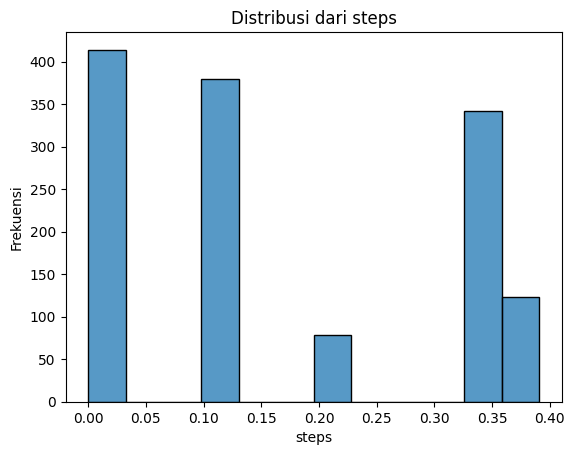

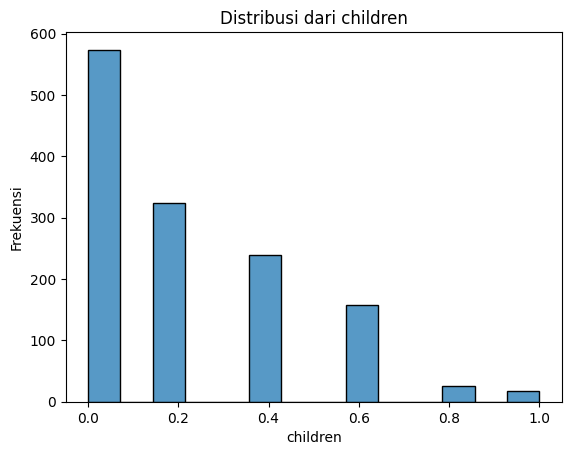

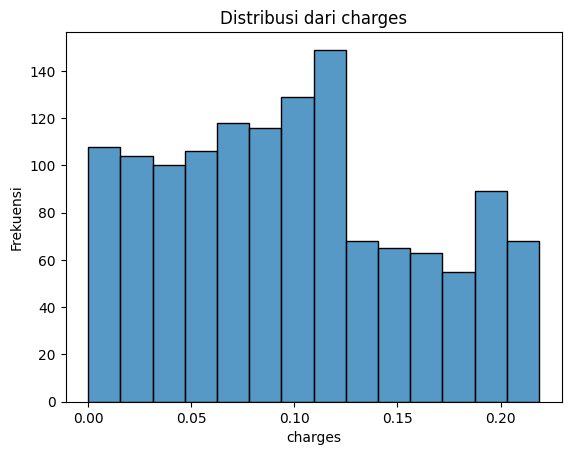

In [46]:
df['charges'] = df['charges'] + 1
df['age'] = df['age'] + 1
df['steps'] = df['steps'] + 1

# Melakukan transformasi Box-Cox pada kolom 'charges'
df['charges'], _ = boxcox(df['charges'])

# Melakukan transformasi Box-Cox pada kolom 'age'
df['age'], _ = boxcox(df['age'])

# Melakukan transformasi Box-Cox pada kolom 'steps'
df['steps'], _ = boxcox(df['steps'])

# Menampilkan distribusi data yang sudah dinormalisasi

for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.title(f'Distribusi dari {column}')
    plt.show()

Untuk memastikan bahwa *dataset* hasil transformasi ini sudah dapat diproses dengan lebih baik, dataset harus dipastikan terlebih dahulu apakah masih ada *outliers* atau tidak. Apabila iya, digunakan dua metode untuk memangkas *outliers* tersebut, yakni dengan metode IQR dan metode Z-Score. Berikut adalah implementasinya.

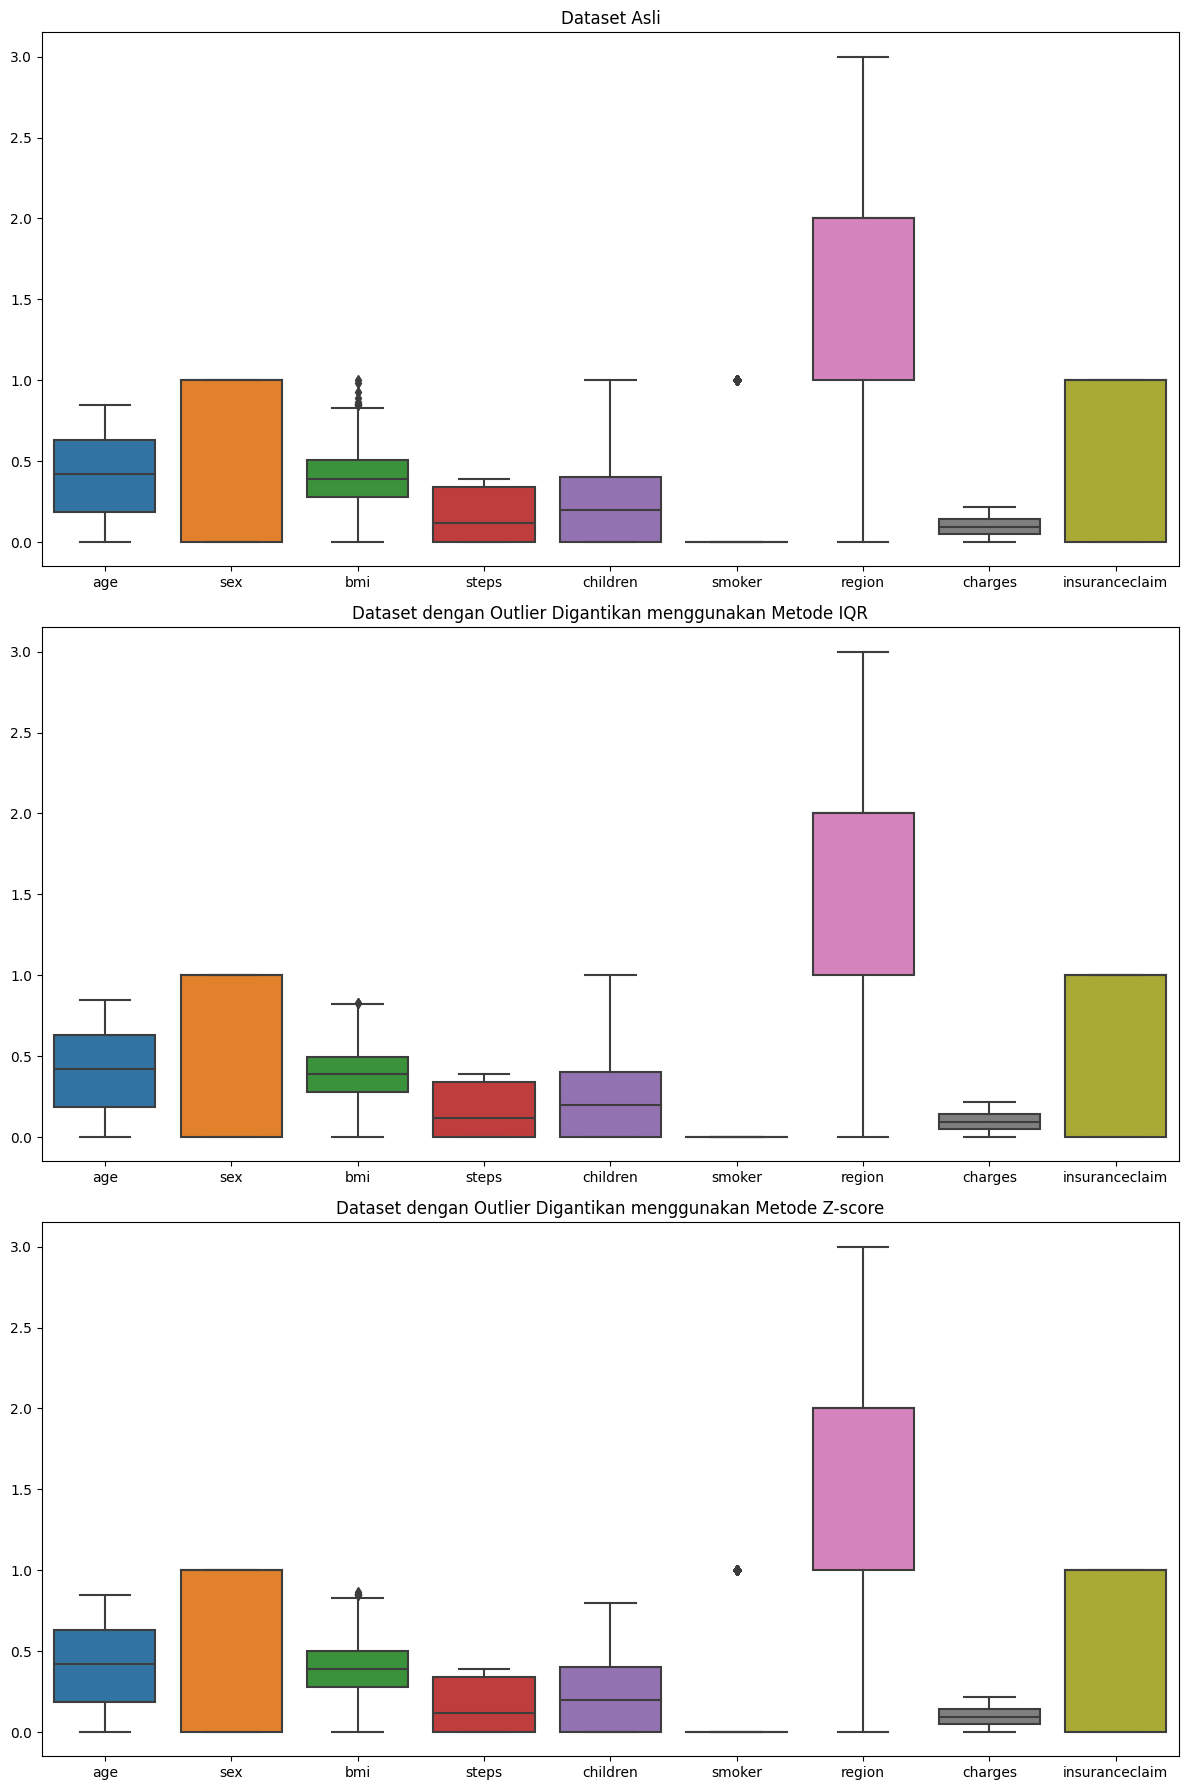

In [47]:
# Fungsi untuk menggantikan outlier dengan metode IQR 
def replace_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for column in df.columns:
        median = df[column].median()
        df[column] = np.where((df[column] < lower_bound[column]) | (df[column] > upper_bound[column]), median, df[column])
    return df

from scipy import stats

def replace_outliers_z_score(df, threshold=3):
    for column in df.columns:
        column_data = df[column]
        median = column_data.median()
        z_scores = (column_data - column_data.mean()) / column_data.std()
        df[column] = np.where(np.abs(z_scores) > threshold, median, column_data)
    return df

# Menggantikan outlier dengan median menggunakan metode IQR
df_iqr = replace_outliers_iqr(df.copy())

# Menggantikan outlier dengan median menggunakan metode Z-score
df_z_score = replace_outliers_z_score(df.copy())

# Membuat boxplot untuk dataset asli
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title('Dataset Asli')

# Membuat boxplot untuk dataset dengan outlier yang digantikan menggunakan metode IQR
sns.boxplot(data=df_iqr, ax=axes[1])
axes[1].set_title('Dataset dengan Outlier Digantikan menggunakan Metode IQR')

# Membuat boxplot untuk dataset dengan outlier yang digantikan menggunakan metode Z-score
sns.boxplot(data=df_z_score, ax=axes[2])
axes[2].set_title('Dataset dengan Outlier Digantikan menggunakan Metode Z-score')

plt.tight_layout()
plt.show()


Bisa dilihat bahwa implementasi menggunakan metode IQR sangat membantu untuk memangkas *outliers*. Maka dari itu, untuk proses selanjutnya digunakan *dataframe* dari proses IQR.

## Bagian B Eksplorasi Data

Berikut adalah beberapa implementasi yang dilakukan untuk mengeksplorasi data lebih lanjut

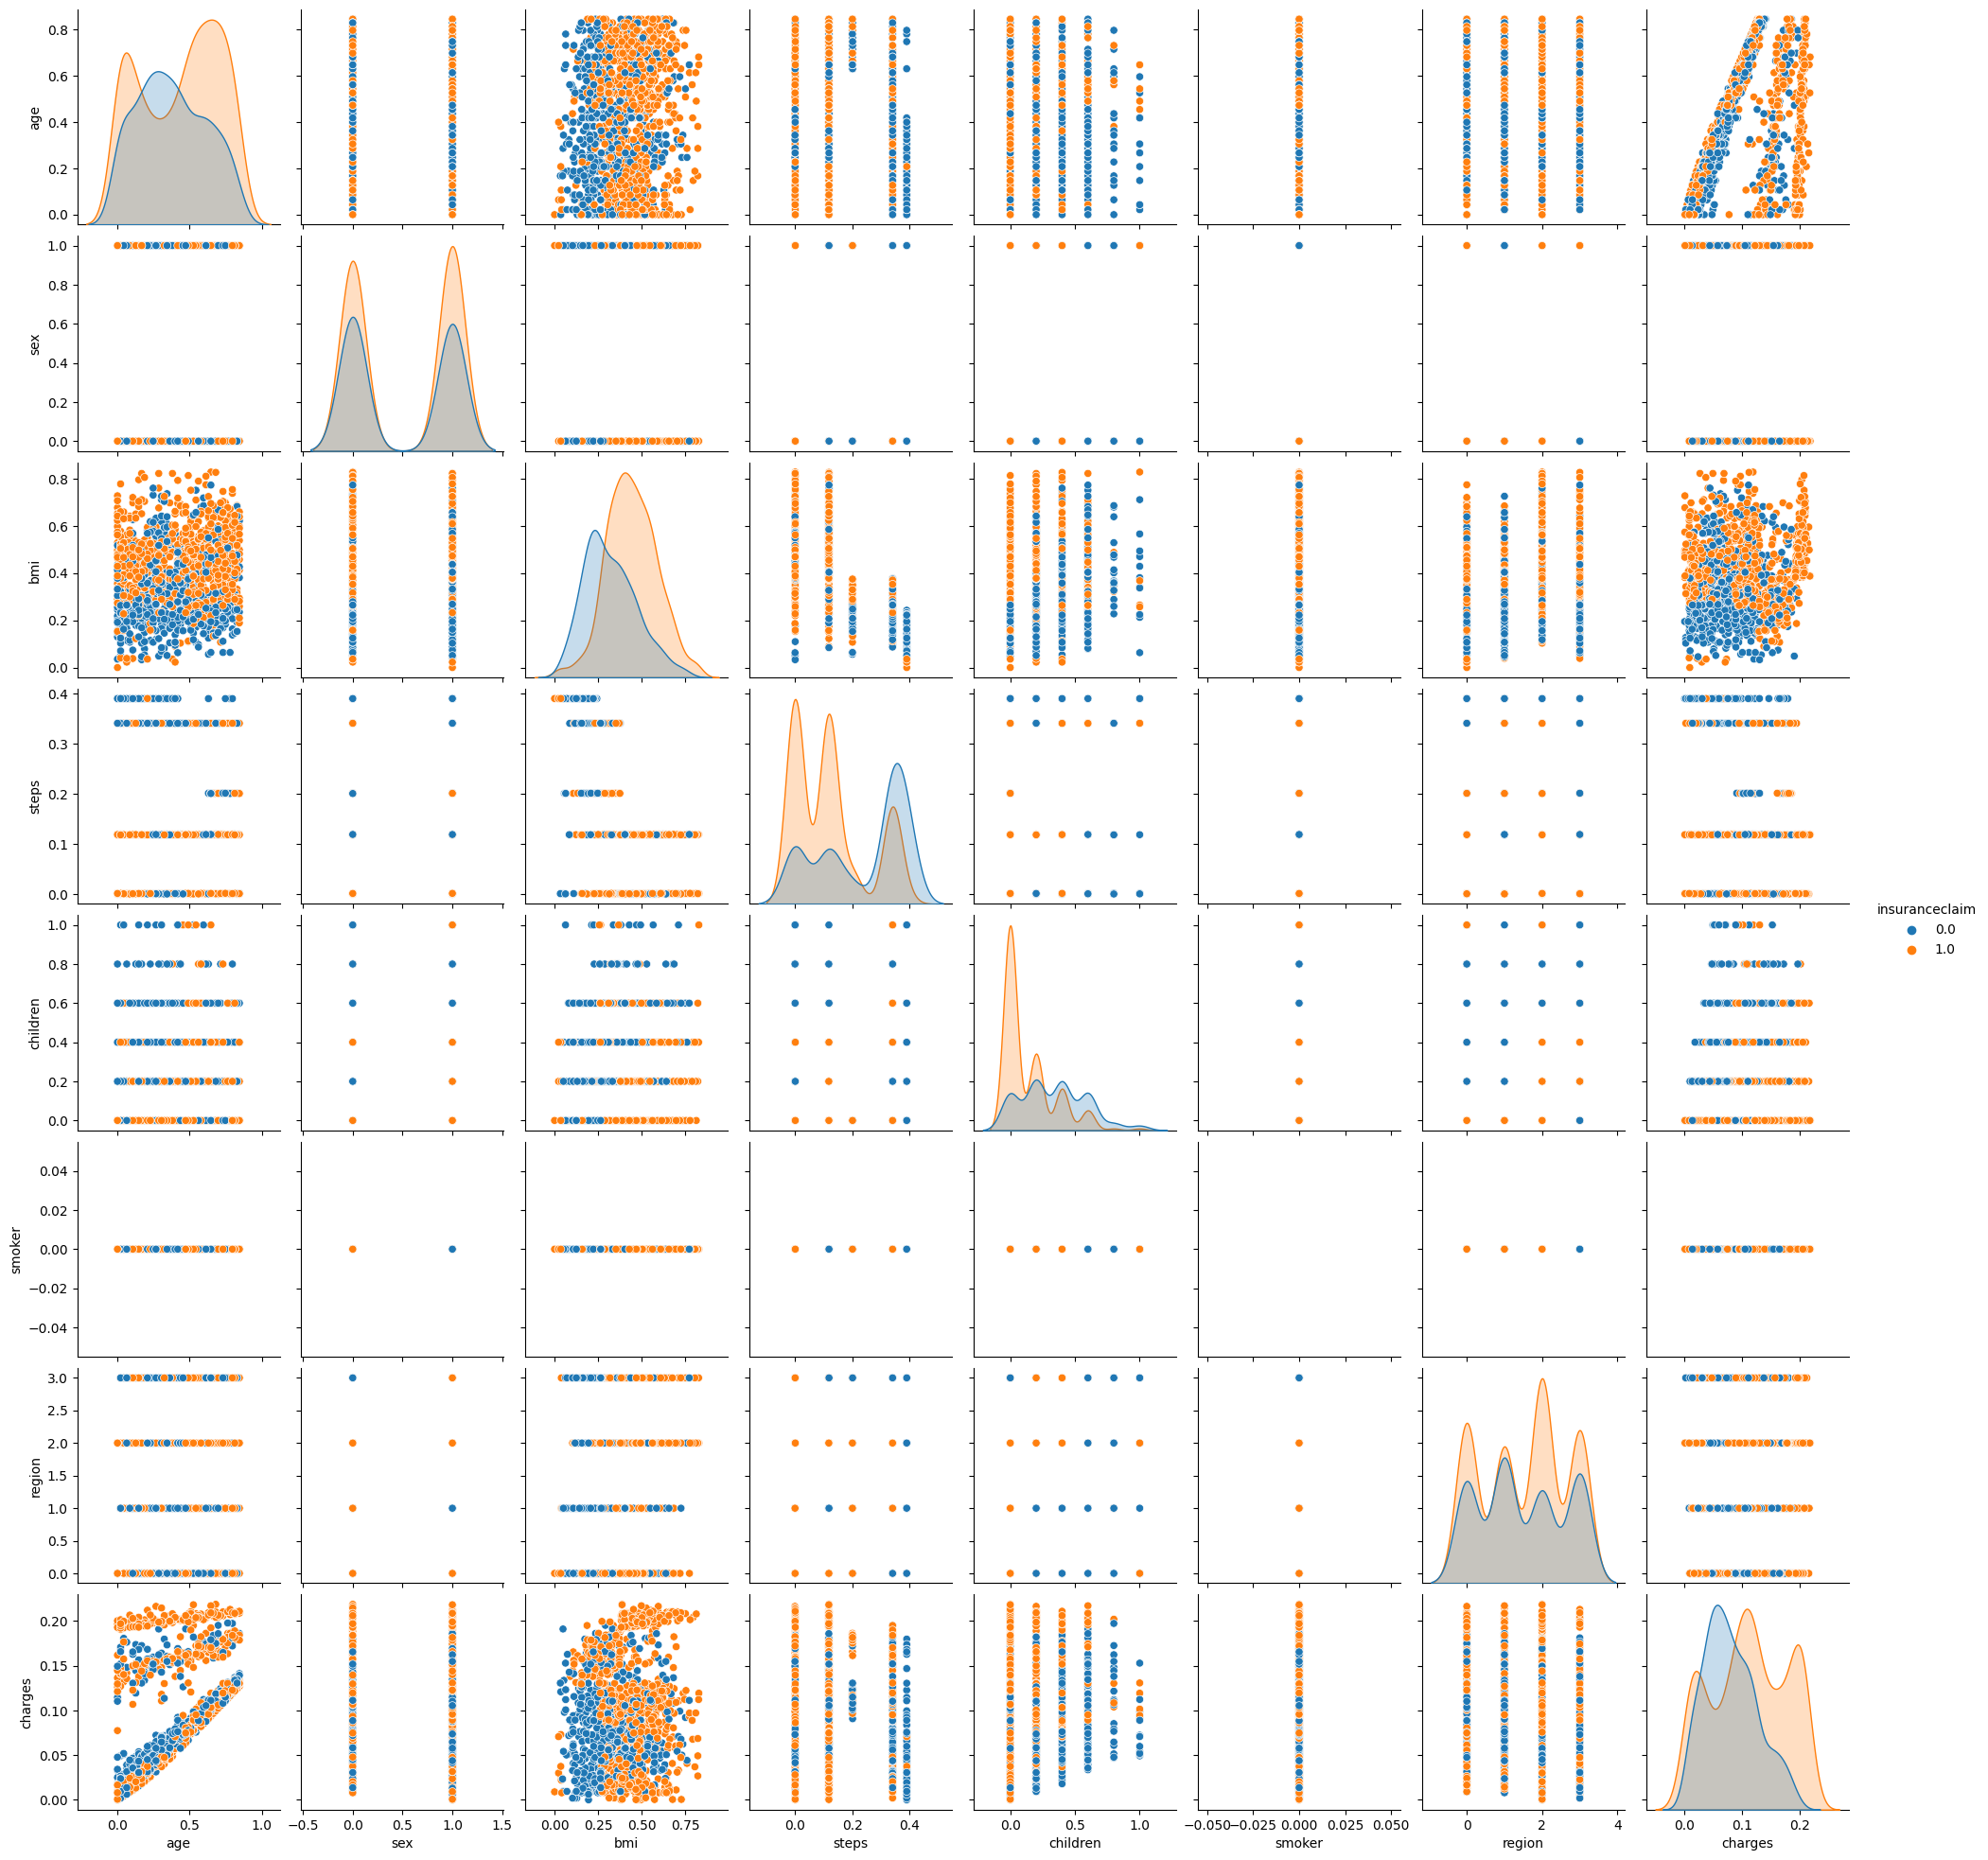

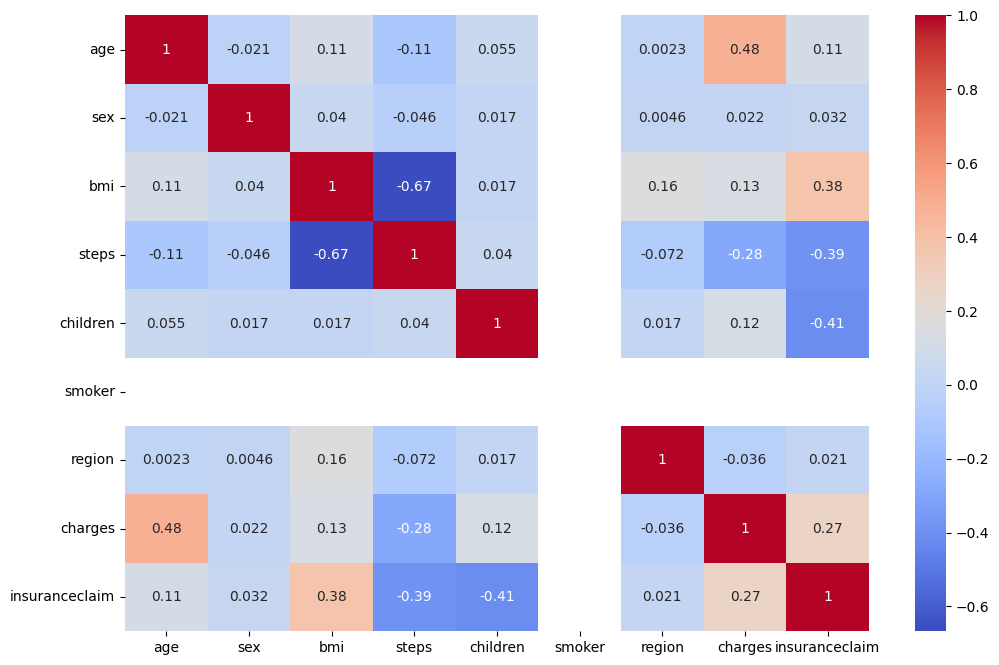

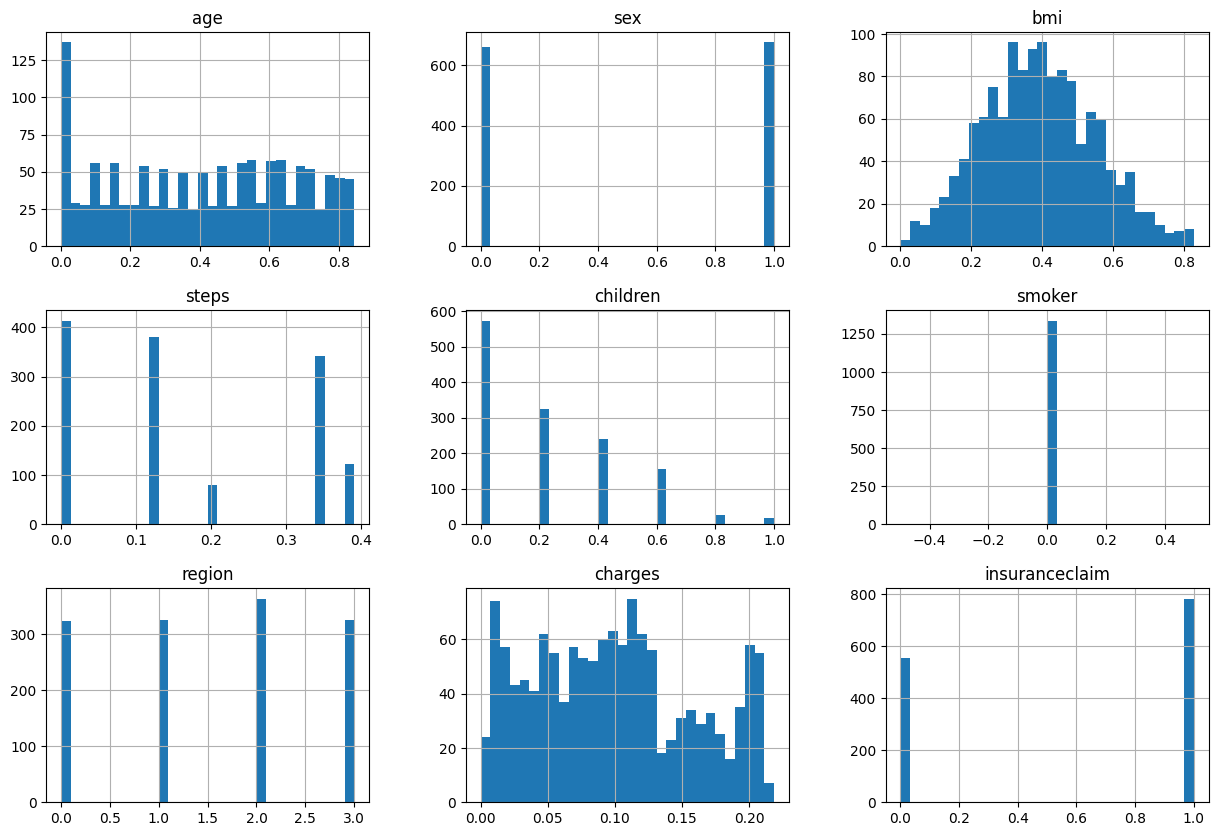

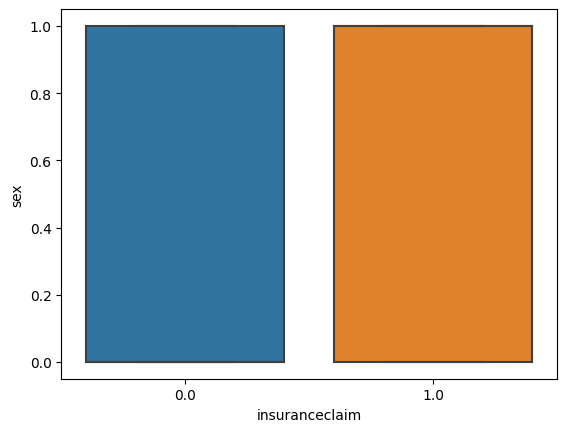

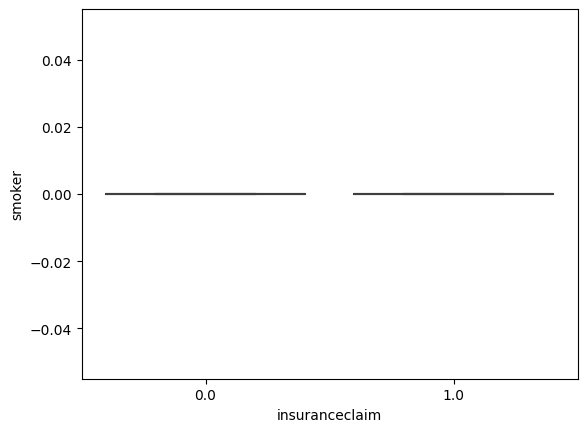

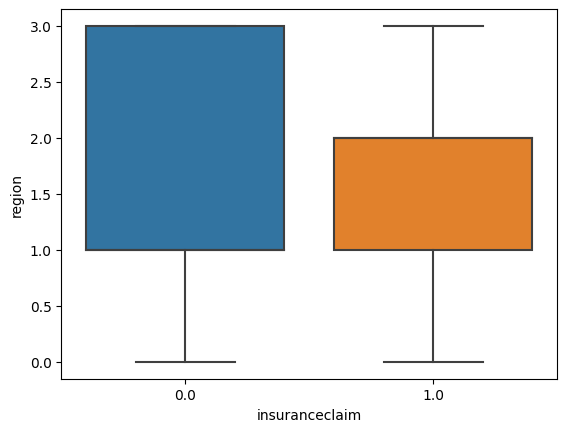

In [48]:
# Menggunakan dataset hasil IQR
df = df_iqr 

sns.pairplot(df, hue='insuranceclaim')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

df.hist(bins=30, figsize=(15, 10))
plt.show()

categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    sns.boxplot(data=df, x='insuranceclaim', y=feature)
    plt.show()

In [ ]:
# Membagi dataset 

## Bagian C